In [35]:
# Main modules
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('publication23.mplstyle')

# Integration
from scipy.integrate import quad

# Custom modules
import modules_py.functions as f

In [36]:
def get_data_from_file(filename):
    '''Data getter.'''
    data = np.genfromtxt(filename)
    if data.ndim == 1:
        return np.array([data[0]]), np.array([data[1:]])
    else:
        return data[:, 0], data[:, 1:]

# Sorting key
import re
def atoi(text):
    '''Turns text to numbers.'''
    return int(text) if text.isdigit() else text
def natural_keys(text):
    '''Keys for intuitive string sorting.'''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [44]:
def integrand(w, k, pf):
    return 2 / np.pi * w * f.d_pnn_corr_pnd(k, w, pf, width=0).imag

pf = 1.520
n_pf = 2 * pf ** 3 / (3 * np.pi ** 2 * 0.47)
pf_name = '%.3f/' % pf
graphs_dir = 'graph_data/'
function_name = 'unity_eq_pnn_corr_pnd/'
directory_name = graphs_dir + function_name + pf_name

graph_files = os.listdir(directory_name)
graph_files.sort(key=natural_keys)

In [40]:
k_sum_rule = np.array([])
sum_rule_total = np.array([])

sum_rule_contribution_integral = np.array([])
sum_rule_contribution_sum = np.array([])

for graph_file in graph_files:
    K, W = get_data_from_file(directory_name + graph_file)
    k_sum_rule = np.append(k_sum_rule, K)
    
    for i, k in enumerate(K):
        tmp_integral, _ = quad(integrand, 1e-9, 9, args=(k, pf))
        
        tmp_sum = 0
        for w in W[i, :]:
            if np.abs(f.d_pnn_corr_pnd(k, w, pf, width=0).imag) < 1e-5:
                tmp_sum += 2. * w / (2. * w - f.pi_pnn_corr_pnd_dw(k, w, pf))
        
        sum_rule_contribution_integral = np.append(sum_rule_contribution_integral, tmp_integral)
        sum_rule_contribution_sum = np.append(sum_rule_contribution_sum, tmp_sum)
        sum_rule_total = np.append(sum_rule_total, tmp_integral + tmp_sum)

<ipython-input-40-6ca22b1f6734>:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  tmp_integral, _ = quad(integrand, 1e-9, 9, args=(k, pf))


/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


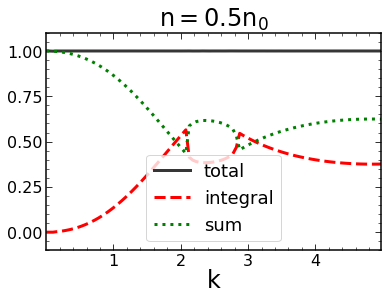

In [52]:
plt.plot(k_sum_rule, sum_rule_total, color='#363636', label='total')
plt.plot(k_sum_rule, sum_rule_contribution_integral, color='red', ls='--', label='integral')
plt.plot(k_sum_rule, sum_rule_contribution_sum, color='green', ls=':', label='sum')

plt.title(r'$n = %.1f n_0$' % n_pf)
plt.xlabel(r'$k$')
plt.ylim(-.1, 1.1)
plt.legend()
plt.show()